#Árboles

In [25]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df = pd.read_csv('/content/drive/MyDrive/Aprendizaje Supervisado/Bases de Datos/wdbc.data')

In [27]:
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [28]:
cols = ['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
        'concavity_mean', 'concave_points_mean', 'simmetry_mean', 'fractal_dim_mean', 'radius_sd', 'texture_sd', 'perimeter_sd',
        'area_sd', 'smoothness_sd', 'compactness_sd', 'concavity_sd', 'concave_points_sd', 'simmetry_sd', 'fractal_dim_sd',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
        'concavity_worst', 'concave_points_worst', 'simmetry_worst', 'fractal_dim_worst']

In [29]:
df.columns = cols

In [30]:
#Fijamos el ID como el índice de la tabla
df.set_index ('ID', inplace = True)
#Observamos la generadlidad de las características para mirar la integridad de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 842517 to 92751
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diagnosis             568 non-null    object 
 1   radius_mean           568 non-null    float64
 2   texture_mean          568 non-null    float64
 3   perimeter_mean        568 non-null    float64
 4   area_mean             568 non-null    float64
 5   smoothness_mean       568 non-null    float64
 6   compactness_mean      568 non-null    float64
 7   concavity_mean        568 non-null    float64
 8   concave_points_mean   568 non-null    float64
 9   simmetry_mean         568 non-null    float64
 10  fractal_dim_mean      568 non-null    float64
 11  radius_sd             568 non-null    float64
 12  texture_sd            568 non-null    float64
 13  perimeter_sd          568 non-null    float64
 14  area_sd               568 non-null    float64
 15  smoothness_sd        

In [31]:
#Revisamos el balanceo de las clases
df.Diagnosis.value_counts()

,count
Diagnosis,
B,357
M,211


In [32]:
from sklearn.tree import DecisionTreeClassifier
#Hacemos la partición de los daotos
#Separamos la etiqueta de los datos
X = df.drop('Diagnosis', axis = 1)
y = df.Diagnosis
#Hacemos la partición entrenamiento/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [33]:
from sklearn.metrics import f1_score

#Instaciamos el midelo por defecto
model = DecisionTreeClassifier()
#Entrenamos el modelo
model.fit(X_train, y_train)
#Calculamos el f1-score para entrenamiento y para validación
train_socre = f1_score(y_train, model.predict(X_train), average = 'weighted')
test_score = f1_score(y_test, model.predict(X_test), average = 'weighted')
#Visualizamos las métricas calculadas
print(f'Train Score: {train_socre}')
print(f'Test Score: {test_score}')


Train Score: 1.0
Test Score: 0.9350993774297272


In [34]:
#Imprimimos el repoder del entrenamiento
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       250
           M       1.00      1.00      1.00       147

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397



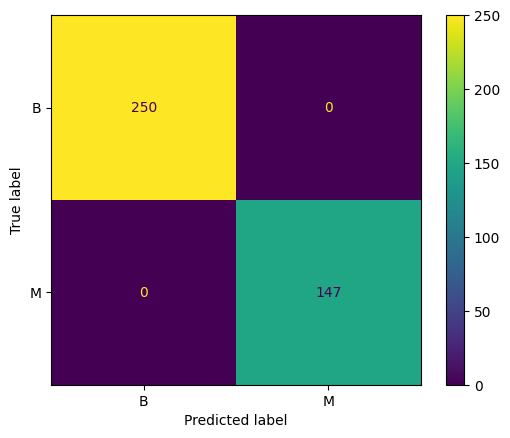

In [35]:
#Visualizamos la matriz de confusión de entrenamiento
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_train, y_train);

In [36]:
#Realizamos el mismo procedimiento de visualización de métricas para el test
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           B       0.93      0.97      0.95       107
           M       0.95      0.88      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



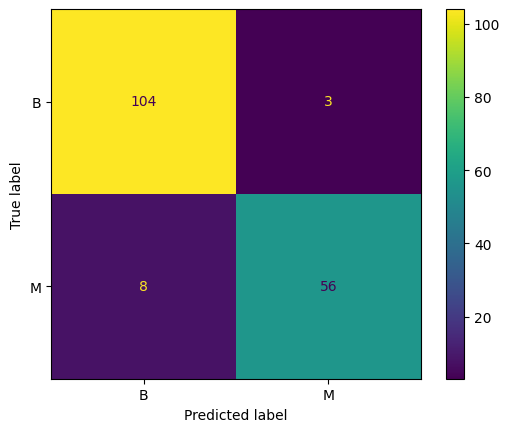

In [37]:
#Visualizamos la matriz de confusión test
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [38]:
#Visualizamos el árbol
from sklearn.tree import export_text
#Estructura
print(export_text(model, feature_names=list(X.columns.values)))

|--- concave_points_mean <= 0.05
|   |--- radius_worst <= 16.83
|   |   |--- simmetry_sd <= 0.01
|   |   |   |--- class: M
|   |   |--- simmetry_sd >  0.01
|   |   |   |--- smoothness_sd <= 0.00
|   |   |   |   |--- concavity_worst <= 0.19
|   |   |   |   |   |--- class: B
|   |   |   |   |--- concavity_worst >  0.19
|   |   |   |   |   |--- class: M
|   |   |   |--- smoothness_sd >  0.00
|   |   |   |   |--- texture_worst <= 33.35
|   |   |   |   |   |--- class: B
|   |   |   |   |--- texture_worst >  33.35
|   |   |   |   |   |--- texture_worst <= 33.56
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- texture_worst >  33.56
|   |   |   |   |   |   |--- class: B
|   |--- radius_worst >  16.83
|   |   |--- texture_mean <= 19.54
|   |   |   |--- fractal_dim_mean <= 0.06
|   |   |   |   |--- class: B
|   |   |   |--- fractal_dim_mean >  0.06
|   |   |   |   |--- class: M
|   |   |--- texture_mean >  19.54
|   |   |   |--- class: M
|--- concave_points_mean >  0.05
|   |--- p

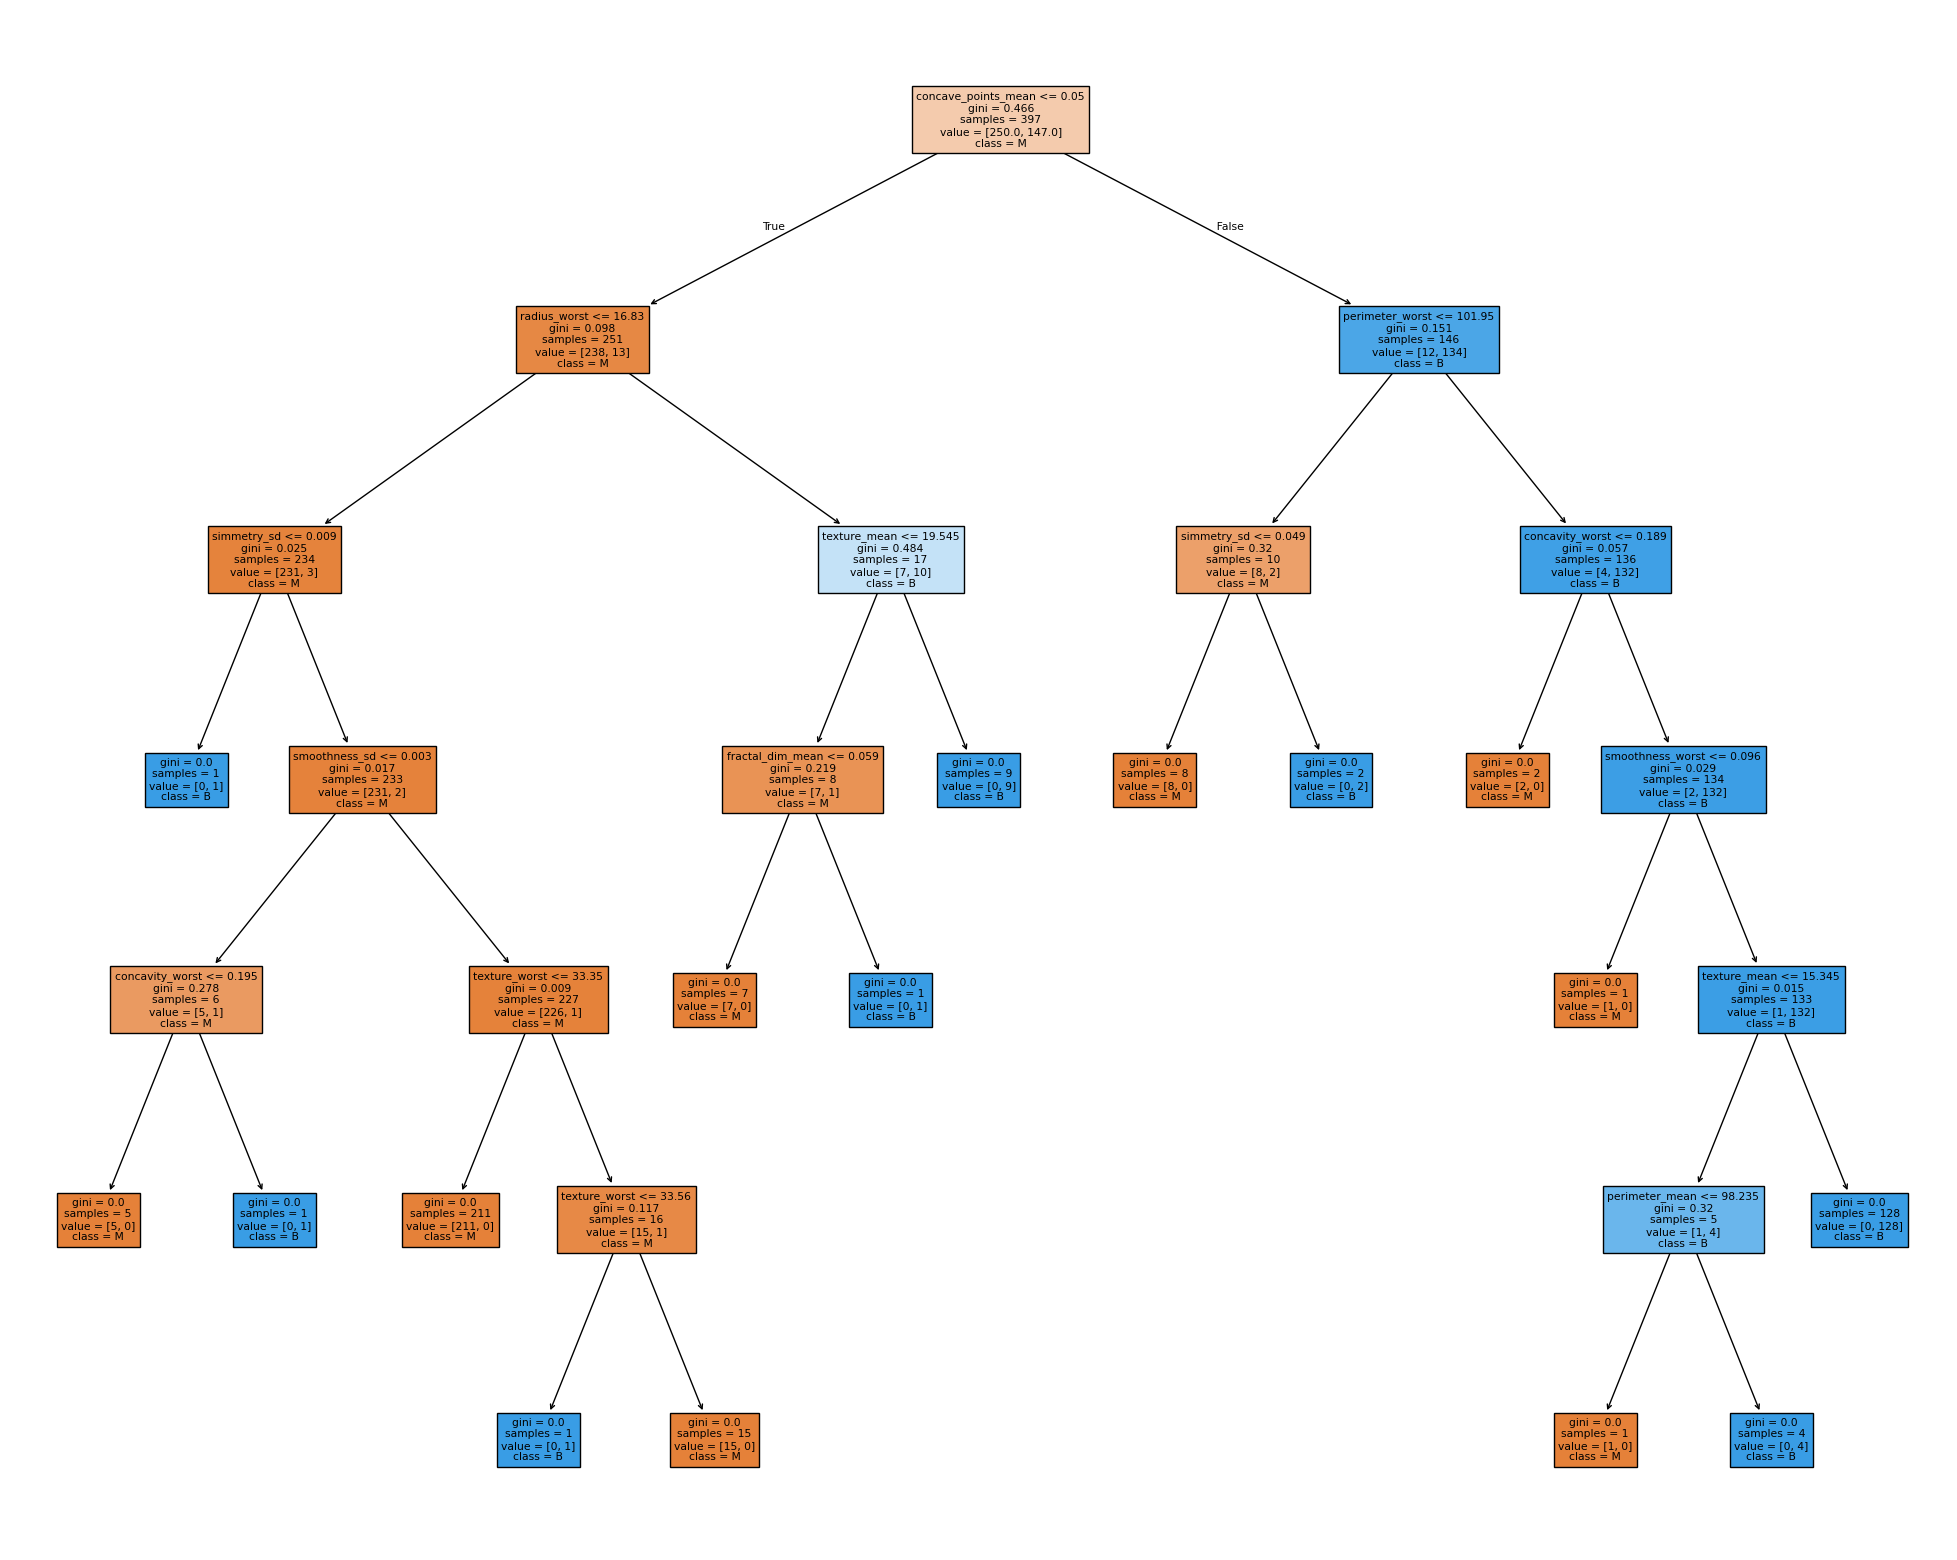

In [39]:
import matplotlib.pyplot as plt
from sklearn import tree

#Gráfico del árbol
plt.figure(figsize=(25,20))
tree.plot_tree(model, feature_names = X.columns, class_names=y.unique(), filled=True);

##Prunning

### Factor de complejidad ccp_alpha

In [40]:
from re import search
#Cargamos las librerías para ajustar el hiperparametro
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.preprocessing import LabelEncoder

#Instanciamos el codificador de etiqueta
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

#Generamos los valores para la búsqueda del ccp_alpha
dist = {'ccp_alpha': loguniform(0.001, 10)}
#Hacemos la sintonización del hiperparámetro
search = RandomizedSearchCV(DecisionTreeClassifier(), dist, scoring = 'fi_weighted')
#Entrenamos el modelo con el hiperparámetro sintonizado
search.fit(X_train, y_train_le)

InvalidParameterError: The 'scoring' parameter of RandomizedSearchCV must be a str among {'f1_micro', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'precision', 'precision_samples', 'mutual_info_score', 'r2', 'recall', 'completeness_score', 'neg_mean_absolute_percentage_error', 'fowlkes_mallows_score', 'precision_macro', 'roc_auc', 'adjusted_rand_score', 'jaccard_weighted', 'average_precision', 'f1_weighted', 'max_error', 'neg_mean_squared_log_error', 'precision_weighted', 'recall_micro', 'homogeneity_score', 'neg_root_mean_squared_error', 'recall_samples', 'roc_auc_ovr_weighted', 'f1_macro', 'rand_score', 'balanced_accuracy', 'accuracy', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'jaccard_micro', 'recall_macro', 'matthews_corrcoef', 'neg_mean_gamma_deviance', 'jaccard_macro', 'roc_auc_ovo', 'v_measure_score', 'precision_micro', 'neg_median_absolute_error', 'top_k_accuracy', 'neg_mean_poisson_deviance', 'f1', 'adjusted_mutual_info_score', 'neg_negative_likelihood_ratio', 'explained_variance', 'roc_auc_ovr', 'd2_absolute_error_score', 'positive_likelihood_ratio', 'neg_brier_score', 'jaccard', 'recall_weighted', 'jaccard_samples', 'roc_auc_ovo_weighted', 'f1_samples'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got 'fi_weighted' instead.

In [ ]:
#Calculamos las métricas en el test
test_score = f1_score(y_test_le, search.predict(X_test), average = 'weighted')
#Visualizamos las métricas calculadas
print(f'Test Score: {test_score}')

In [ ]:
#Observamos la matrix de consfusión
ConfusionMatrixDisplay.from_estimator(search.best_estimator_, X_test, y_test_le);

In [ ]:
#Gráfico del árbol
plt.figure(figsize=(25,20))
tree.plot_tree(search.best_estimator_, feature_names = X.columns, class_names=y.unique(), filled=True);

## Método Pre

In [ ]:
#Modificamos el máximo nivel de profundidad
from sklearn.model_selection import GridSearchCV

#Construimos la distribución de la máximo profundidad
grid = {'max_depth': np.arange(3,8)}
#Realizamos la búsqueda
grid_search = GridSearchCV(DecisionTreeClassifier(), grid, scoring = 'fi_weighted')
#Entrenamos el modelo
grid_search.fit(X_train, y_train_le)

In [ ]:
#Revisamos el desempeño
print(f'Train score: {grid_search.score(X_train, y_train_le)}')
print(f'Test score: {grid_search.score(X_test, y_test_le)}')

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test_le);

## Importancia de las características

In [ ]:
df_importancia = pd.DataFrame({'feature': X.columns, 'importance': grid_search.best_estimator_.feature_importances_})

In [ ]:
df_importancia.sort_values('importance', ascending = False)

## Árboles como regresores

In [41]:

#cargamos el archivo
import pandas as pd
import numpy as npf
import matplotlib.pyplot as plt

carros = pd.read_csv('/content/drive/MyDrive/Aprendizaje Supervisado/Bases de Datos/auto-mpg.data', sep = '\s+', header = None,
                     na_values = ['?'], names = ['mpg', 'cylinders',
                                                 'displacement', 'horsepower',
                                                 'weight', 'acceleration',
                                                 'model_year', 'origin', 'car_name'])

In [42]:
carros.set_index('car_name', inplace = True)
carros.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [44]:
#Revisamos la integridad de los datos
carros.info()
#Recordar que los árboles funcionan con datasets que tienen datos nulos

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 28.0+ KB


In [45]:
#Hacemos las particiones de etiquetas y train_test
X = carros.drop('mpg', axis = 1)
y = carros.mpg
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [46]:
#Implementamos el modelo de la regresión
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Instanciamos el modelo
model = DecisionTreeRegressor(random_state=1)
#Entrenamos el modelo
model.fit(X_train, y_train)

#Imprimimos las métricas de desempeño
print(f'Train score: {mean_squared_error(y_train, model.predict(X_train))}')
print(f'Test score: {mean_squared_error(y_test, model.predict(X_test))}')

Train score: 0.08812949640287769
Test score: 11.656166666666666


In [47]:
#Visualizamos la estructura del árbol
print(export_text(model, feature_names=list(X.columns.values)))

|--- cylinders <= 4.50
|   |--- horsepower <= 70.50
|   |   |--- model_year <= 77.50
|   |   |   |--- weight <= 1830.00
|   |   |   |   |--- origin <= 2.50
|   |   |   |   |   |--- value: [36.00]
|   |   |   |   |--- origin >  2.50
|   |   |   |   |   |--- displacement <= 81.00
|   |   |   |   |   |   |--- value: [31.00]
|   |   |   |   |   |--- displacement >  81.00
|   |   |   |   |   |   |--- value: [33.00]
|   |   |   |--- weight >  1830.00
|   |   |   |   |--- model_year <= 73.50
|   |   |   |   |   |--- displacement <= 87.50
|   |   |   |   |   |   |--- weight <= 1970.50
|   |   |   |   |   |   |   |--- value: [29.00]
|   |   |   |   |   |   |--- weight >  1970.50
|   |   |   |   |   |   |   |--- value: [30.00]
|   |   |   |   |   |--- displacement >  87.50
|   |   |   |   |   |   |--- value: [26.00]
|   |   |   |   |--- model_year >  73.50
|   |   |   |   |   |--- origin <= 2.50
|   |   |   |   |   |   |--- model_year <= 75.00
|   |   |   |   |   |   |   |--- value: [31.00]
|   

In [48]:
#Realizamos una poda para evitar el sobre-ajuste
dist = {'ccp_alpha': loguniform(le-3,le2)}
search = RandomizedSearchCV(DecisionTreeRegressor(random_state=1), dist, scoring = 'neg_mean_squared_error')
search.fit(X_train, y_train)

#Calculamos las métricas de desempeño
test_score = mean_squared_error(y_test, search.best_estimator_predict(X_test))
print(f'Test score: {test_score}')
train_score = mean_squared_error(y_train, search.best_estimator_.predict(X_train))
print(f'Train score: {train_score}')

TypeError: unsupported operand type(s) for -: 'LabelEncoder' and 'int'

In [ ]:
print(export_text(search.best_estimator_, feature_names=list(X.columns.values))

In [ ]:
#Hacemos una poda por mínimo de muestras por hoja
